# Masking in Linear Regression

In this example, we will look at handling the masking issue that can arise while doing linear regression.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Let us start by generating the data for this experiment. We will have three classes, and draw datapoints for each from a Gaussian.

In [12]:
def generate_3class_data(class1Mean, class1Cov, class2Mean, class2Cov, class3Mean, class3Cov, plot=True):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    class3x = np.random.multivariate_normal(class3Mean, class3Cov, 100)
    class3y = np.ones(100)
    class3y.fill(2)
    X = np.concatenate((class1x, class2x, class3x), axis=0)
    y = np.concatenate((class1y, class2y, class3y))

    # Plotting the 2-class data
    if(plot):
        plt.title('Plotting 2-dimensional 3-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
        plt.scatter(class3x[:,0], class3x[:,1], color = 'g', label = 'Class 2')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

    # Splitting train and test data
    
    return X,y

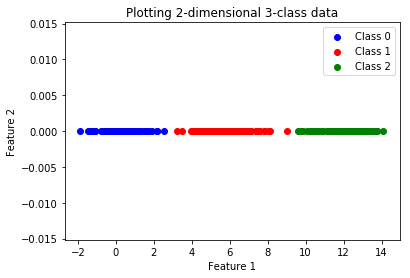

In [13]:
class1Mean = [0, 0]
class1Cov = [[1, 0], [0,0]]

class2Mean = [6, 0]
class2Cov = [[1, 0], [0,0]]

class3Mean = [12, 0]
class3Cov = [[1, 0], [0,0]]

X,y = generate_3class_data(class1Mean, class1Cov, class2Mean, class2Cov, class3Mean, class3Cov)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Encoding labels for multiclass classification
y_labels, y_train = np.unique(y_train, return_inverse=True)
y_encoded = np.eye(3)[y_train]
_, y_test = np.unique(y_test, return_inverse=True)

Now we will fit a linear regression model to this data.

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_encoded)
y_pred = lr.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [15]:
# Plot the results
def plot(lr, X_train, y_train):
    cmap = plt.cm.coolwarm
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

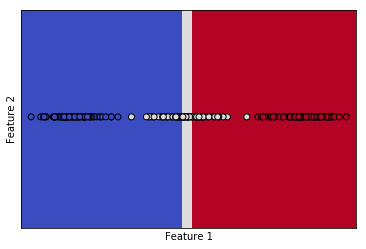

In [16]:
plot(lr, X_train, y_train)

We can see that the class represented by white points rarely dominates, and is largely dropped by the classifier.

### Basis Expansions

To mitigate the issue of masking, we can allow for nonlinear boundaries by introducing basis expansions. 

In [17]:
# Generate basis expansions of degree K-1 = 3-1 = 2

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

Let us fit the model again, and see if this improves the classification boundary.

In [18]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=123)
y_labels_poly, y_train_poly = np.unique(y_train_poly, return_inverse=True)
y_encoded_poly = np.eye(3)[y_train_poly]
_, y_test_poly = np.unique(y_test_poly, return_inverse=True)

# Fit linear regression model on the transformed features

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_encoded_poly)
y_pred_poly = lr_poly.predict(X_test_poly)
y_pred_poly = np.argmax(y_pred_poly, axis=1)

# Plot decision boundary

cmap = plt.cm.coolwarm
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_data = poly.transform(grid_data)
Z = lr_poly.predict(grid_data)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

The classification is a lot better! More of the white points have been covered.

## Another example

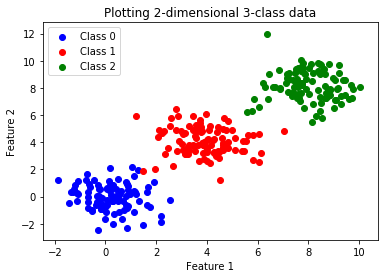

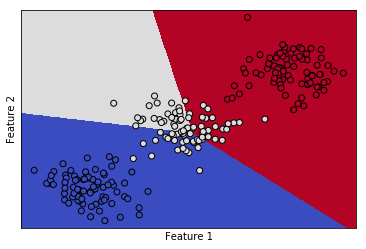

In [19]:
# Generate data

class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [4, 4]
class2Cov = [[1, 0], [0,1]]

class3Mean = [8, 8]
class3Cov = [[1, 0], [0,1]]

X,y = generate_3class_data(class1Mean, class1Cov, class2Mean, class2Cov, class3Mean, class3Cov, plot=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Encoding labels for multiclass classification
y_labels, y_train = np.unique(y_train, return_inverse=True)
y_encoded = np.eye(3)[y_train]
_, y_test = np.unique(y_test, return_inverse=True)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train,y_encoded)
y_pred = lr.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Plot decision boundary
plot(lr, X_train, y_train)

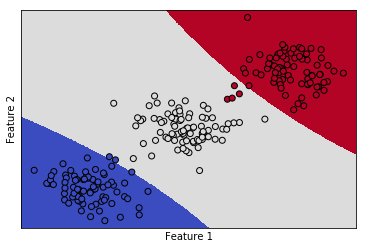

In [20]:
# Generate basis expansions of degree K-1 = 3-1 = 2

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=123)
y_labels_poly, y_train_poly = np.unique(y_train_poly, return_inverse=True)
y_encoded_poly = np.eye(3)[y_train_poly]
_, y_test_poly = np.unique(y_test_poly, return_inverse=True)

# Fit linear regression model on the transformed features

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_encoded_poly)
y_pred_poly = lr_poly.predict(X_test_poly)
y_pred_poly = np.argmax(y_pred_poly, axis=1)

# Plot decision boundary

cmap = plt.cm.coolwarm
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_data = poly.transform(grid_data)
Z = lr_poly.predict(grid_data)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [2]:
from sklearn.preprocessing import PolynomialFeatures
X=[[1,2,3],[2,3,4]]
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)
print(X)

[[ 1.  1.  2.  3.  1.  2.  3.  4.  6.  9.  1.  2.  3.  4.  6.  9.  8. 12.
  18. 27.]
 [ 1.  2.  3.  4.  4.  6.  8.  9. 12. 16.  8. 12. 16. 18. 24. 32. 27. 36.
  48. 64.]]
